# Informe Taller PostgreSQL Python
Por: Shadia Jaafar Ferreira y Mariana Castañeda

Iniciamos creando la imagen y la base de datos desde docker. La cual tiene la siguiente información de conexión:
- Host: localhost
- Port: 5432
- Usuario: myname_user
- Contraseña: password
- Database name: myname_db

A continuación, se muestra el contenedor docker creado.

![Contenedor Docker](docker.png)


Ahora, realicemos la conexión con PgAdmin.

![Conexión con PgAdmin](pgadmin.jpg)


## Conexión con Docker y creación de un cursor

In [35]:
import psycopg2
from psycopg2 import Error

In [36]:
def create_connection():
    connection = None
    try:
        connection = psycopg2.connect(user="myname_user",
                                      password="password",
                                      host="localhost",
                                      port="5432",
                                      database="myname_db")
        print("Conexión a PostgreSQL establecida")
        return connection

    except (Exception, psycopg2.Error) as error:
        print("Error al conectar con PostgreSQL:", error)

def close_connection(connection):
    try:
        if connection:
            connection.close()
            print("Conexión a PostgreSQL cerrada")
    except (Exception, psycopg2.Error) as error:
        print("Error al cerrar la conexión con PostgreSQL:", error)


In [37]:
connection = create_connection()

try:
    cursor = connection.cursor()
    print(connection.get_dsn_parameters(), "\n")

    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("Estás conectado a - ", record, "\n")

finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
{'user': 'myname_user', 'channel_binding': 'prefer', 'dbname': 'myname_db', 'host': 'localhost', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'} 

Estás conectado a -  ('PostgreSQL 16.2 (Debian 16.2-1.pgdg120+2) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',) 

Conexión a PostgreSQL cerrada


## 1. Crear la tabla nombrada: employees, explicar que tarea realiza la consulta realizada y mostrar en pantalla la tabla

In [38]:
connection = create_connection()

try:
    cursor = connection.cursor()
    cursor.execute('''DROP TABLE IF EXISTS employees''')
    cursor.execute('''CREATE TABLE employees(
    employee_id INTEGER
   , first_name VARCHAR(20)
   , last_name VARCHAR(25)
   , email VARCHAR(25)
   , phone_number VARCHAR(20)
   , hire_date DATE
   , job_id VARCHAR(10)
   , salary NUMERIC(8,2)
   , commission_pct NUMERIC(2,2)
   , manager_id INTEGER
   , department_id INTEGER);
    ''')
    print("Table created successfully")
    
    cursor.execute('''CREATE UNIQUE INDEX emp_emp_id_pk
         ON employees (employee_id);''')
    

    cursor.execute(''' ALTER TABLE employees ADD
        PRIMARY KEY (employee_id); ''')
    
    cursor.execute('''SELECT * FROM employees LIMIT 10;''')
    cursor.execute('''SELECT count(1) FROM employees; ''')
    connection.commit()
    
    print("Completed Tasks")
    
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
Table created successfully
Completed Tasks
Conexión a PostgreSQL cerrada


Primeramente se crea una consulta llamada “CREATE TABLE employees” de la cual se ramifican las siguientes columnas first_name con una longitud de caracteres posibles de máximo veinte, last_name con una longitud de máximo veinticinco, email con una longitud máxima de veinticinco, phone_number con una longitud de máximo veinticinco, hire_date para expresar valores que representan una fecha sin información de tiempo, como el año, el mes y el día, también se encuentra la columna de job_id, salary donde la columna puede almacenar números con hasta ocho dígitos en total, de los cuales dos serán dígitos decimales, commission_pct en la cual la columna almacenara hasta dos dígitos de los cuales dos serán decimales, como ultimas columnas se encuentran manager_id y department_id las cuales estarán expresadas en números enteros, posteriormente re realiza la consulta CREATE UNIQUE INDEX para crear un índice único el la tabla, se ejecuta ON employees (employee_id) lo que significa que se está creando un índice en la tabla "employees" y se especifica que el índice se basará en la columna "employee_id", se agrega ALTER TABLE employees ADD para agregar una columna en la tabla especificada, se usa PRIMARY KEY (employee_id) para expresar la columna "employee_id" como la clave primaria, a continuación se ejecuta SELECT * FROM employees LIMIT 10 para seleccionar los primeros 10 registros de la tabla "employees", finalmente se agrega SELECT count(1) FROM employees para obtener el número total de filas en la tabla "employees"

In [39]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute("SELECT * FROM employees")
    rows = cursor.fetchall()
    
    for row in rows:
        print("employee_id = ", row[0])
        print("first_name = ", row[1])
        print("last_name = ", row[2])
        print("email = ", row[3])
        print("phone_number = ", row[4])
        print("hire_date = ", row[5])
        print("job_id = ", row[6])
        print("salary = ", row[7])
        print("commission_pct = ", row[8])
        print("manager_id = ", row[9])
        print("department_id = ", row[10])
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
Conexión a PostgreSQL cerrada


## Crear la tabla courses

In [40]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''DROP TABLE IF EXISTS courses''')
    cursor.execute('''CREATE TABLE courses(
        course_id SERIAL PRIMARY KEY NOT NULL, course_name VARCHAR(60),
        course_author VARCHAR(40), course_status VARCHAR(10),
        course_published_dt DATE)''')
    
    print("Table created sucessfully")
    connection.commit()
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
Table created sucessfully
Conexión a PostgreSQL cerrada


## Insertar datos en la tabla courses

In [41]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''INSERT INTO courses(course_name, course_author, course_status, course_published_dt)
                   VALUES 
                   ('Programming using Python', 'Bob Dillon', 'published', '2020-09-30'),
                   ('Data Engineering using Python', 'Bob Dillon', 'published', '2020-07-15'),
                   ('Data Engineering using Scala', 'Elvis Presley', 'draft', null),
                   ('Programming using Scala', 'Elvis Presley', 'published', '2020-05-12'),
                   ('Programing using Java', 'Mike Jack', 'inactive', '2020-08-12'),
                   ('Web Applications - Java Spring', 'Mike Jack', 'draft', null),
                   ('Pipeline Orchestration -  Python', 'Bob Dillon', 'draft', null),
                   ('Streaming Pipelines - Python', 'Bob Dillon', 'published', '2020-10-05'),
                   ('Web Applications - Scala Play', 'Elvis Presley', 'inactive', '2020-09-30'),
                   ('Web Applications - Python Django', 'Bob Dillon', 'published', '2020-06-23'),
                   ('Server Automation - Ansible', 'Uncle Sam', 'published', '2020-07-05')
                   ''');
    print("Inserted Data")
    connection.commit()
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
Inserted Data
Conexión a PostgreSQL cerrada


## Eliminar los cursos que no están en modo borrador ni publicados

In [42]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''DELETE FROM courses WHERE course_status <> 'draft' AND course_status <> 'published' ''');
    connection.commit()
    print("Total number of rows deleted :", cursor.rowcount)

    cursor.execute("SELECT * FROM courses")
    rows = cursor.fetchall()

    for row in rows:
        print("course_id = ", row[0])
        print("course_name = ", row[1])
        print("course_author = ", row[2])
        print("course_status = ", row[3])
        print("course_published_dt = ", row[4], "\n")

    print("Operation done successfully")
finally:
   close_connection(connection)

Conexión a PostgreSQL establecida
Total number of rows deleted : 2
course_id =  1
course_name =  Programming using Python
course_author =  Bob Dillon
course_status =  published
course_published_dt =  2020-09-30 

course_id =  2
course_name =  Data Engineering using Python
course_author =  Bob Dillon
course_status =  published
course_published_dt =  2020-07-15 

course_id =  3
course_name =  Data Engineering using Scala
course_author =  Elvis Presley
course_status =  draft
course_published_dt =  None 

course_id =  4
course_name =  Programming using Scala
course_author =  Elvis Presley
course_status =  published
course_published_dt =  2020-05-12 

course_id =  6
course_name =  Web Applications - Java Spring
course_author =  Mike Jack
course_status =  draft
course_published_dt =  None 

course_id =  7
course_name =  Pipeline Orchestration -  Python
course_author =  Bob Dillon
course_status =  draft
course_published_dt =  None 

course_id =  8
course_name =  Streaming Pipelines - Python
c

## Recuento de todos los cursos publicados por autor

In [43]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute("SELECT course_author, COUNT(*) AS total_rows FROM courses GROUP BY course_author ORDER BY total_rows DESC")

    rows = cursor.fetchall()

    for row in rows:
        print("course_author =", row[0])
        print("total_rows =", row[1], "\n")

    print("Operación realizada exitosamente")
    
finally:
    close_connection(connection)
    

Conexión a PostgreSQL establecida
course_author = Bob Dillon
total_rows = 5 

course_author = Elvis Presley
total_rows = 2 

course_author = Uncle Sam
total_rows = 1 

course_author = Mike Jack
total_rows = 1 

Operación realizada exitosamente
Conexión a PostgreSQL cerrada


## Crear la base de datos users

In [44]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''DROP TABLE IF EXISTS users''')
    cursor.execute('''CREATE TABLE users(
    user_id SERIAL PRIMARY KEY,
    user_first_name VARCHAR(30),
    user_last_name VARCHAR(30),
    user_email_id VARCHAR(50),
    user_gender VARCHAR(1),
    user_unique_id VARCHAR(15),
    user_phone_no VARCHAR(20),
    user_dob DATE,
    created_ts TIMESTAMP)''');
    connection.commit()
    print("Table users created")
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
Table users created
Conexión a PostgreSQL cerrada


### Insertar valores

In [45]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''INSERT INTO users (user_first_name, user_last_name, user_email_id, user_gender, 
    user_unique_id, user_phone_no, user_dob, created_ts)
     VALUES
    ('Giuseppe', 'Bode', 'gbode0@imgur.com', 'M', '88833-8759', 
     '+86 (764) 443-1967', '1973-05-31', '2018-04-15 12:13:38'),
    ('Lexy', 'Gisbey', 'lgisbey1@mail.ru', 'F', '262501-029', 
     '+86 (751) 160-3742', '2003-05-31', '2020-12-29 06:44:09'),
    ('Karel', 'Claringbold', 'kclaringbold2@yale.edu', 'F', '391-33-2823', 
     '+62 (445) 471-2682', '1985-11-28', '2018-11-19 00:04:08'),
    ('Marv', 'Tanswill', 'mtanswill3@dedecms.com', 'F', '1195413-80', 
     '+62 (497) 736-6802', '1998-05-24', '2018-11-19 16:29:43'),
    ('Gertie', 'Espinoza', 'gespinoza4@nationalgeographic.com', 'M', '471-24-6869', 
     '+249 (687) 506-2960', '1997-10-30', '2020-01-25 21:31:10'),
    ('Saleem', 'Danneil', 'sdanneil5@guardian.co.uk', 'F', '192374-933', 
     '+63 (810) 321-0331', '1992-03-08', '2020-11-07 19:01:14'),
    ('Rickert', 'O''Shiels', 'roshiels6@wikispaces.com', 'M', '749-27-47-52', 
     '+86 (184) 759-3933', '1972-11-01', '2018-03-20 10:53:24'),
    ('Cybil', 'Lissimore', 'clissimore7@pinterest.com', 'M', '461-75-4198', 
     '+54 (613) 939-6976', '1978-03-03', '2019-12-09 14:08:30'),
    ('Melita', 'Rimington', 'mrimington8@mozilla.org', 'F', '892-36-676-2', 
     '+48 (322) 829-8638', '1995-12-15', '2018-04-03 04:21:33'),
    ('Benetta', 'Nana', 'bnana9@google.com', 'M', '197-54-1646', 
     '+420 (934) 611-0020', '1971-12-07', '2018-10-17 21:02:51'),
    ('Gregorius', 'Gullane', 'ggullanea@prnewswire.com', 'F', '232-55-52-58', 
     '+62 (780) 859-1578', '1973-09-18', '2020-01-14 23:38:53'),
    ('Una', 'Glayzer', 'uglayzerb@pinterest.com', 'M', '898-84-336-6', 
     '+380 (840) 437-3981', '1983-05-26', '2019-09-17 03:24:21'),
    ('Jamie', 'Vosper', 'jvosperc@umich.edu', 'M', '247-95-68-44', 
     '+81 (205) 723-1942', '1972-03-18', '2020-07-23 16:39:33'),
    ('Calley', 'Tilson', 'ctilsond@issuu.com', 'F', '415-48-894-3', 
     '+229 (698) 777-4904', '1987-06-12', '2020-06-05 12:10:50'),
    ('Peadar', 'Gregorowicz', 'pgregorowicze@omniture.com', 'M', '403-39-5-869', 
     '+7 (267) 853-3262', '1996-09-21', '2018-05-29 23:51:31'),
    ('Jeanie', 'Webling', 'jweblingf@booking.com', 'F', '399-83-05-03', 
     '+351 (684) 413-0550', '1994-12-27', '2018-02-09 01:31:11'),
    ('Yankee', 'Jelf', 'yjelfg@wufoo.com', 'F', '607-99-0411', 
     '+1 (864) 112-7432', '1988-11-13', '2019-09-16 16:09:12'),
    ('Blair', 'Aumerle', 'baumerleh@toplist.cz', 'F', '430-01-578-5', 
     '+7 (393) 232-1860', '1979-11-09', '2018-10-28 19:25:35'),
    ('Pavlov', 'Steljes', 'psteljesi@macromedia.com', 'F', '571-09-6181', 
     '+598 (877) 881-3236', '1991-06-24', '2020-09-18 05:34:31'),
    ('Darn', 'Hadeke', 'dhadekej@last.fm', 'M', '478-32-02-87', 
     '+370 (347) 110-4270', '1984-09-04', '2018-02-10 12:56:00'),
    ('Wendell', 'Spanton', 'wspantonk@de.vu', 'F', null, 
     '+84 (301) 762-1316', '1973-07-24', '2018-01-30 01:20:11'),
    ('Carlo', 'Yearby', 'cyearbyl@comcast.net', 'F', null, 
     '+55 (288) 623-4067', '1974-11-11', '2018-06-24 03:18:40'),
    ('Sheila', 'Evitts', 'sevittsm@webmd.com', null, '830-40-5287',
     null, '1977-03-01', '2020-07-20 09:59:41'),
    ('Sianna', 'Lowdham', 'slowdhamn@stanford.edu', null, '778-0845', 
     null, '1985-12-23', '2018-06-29 02:42:49'),
    ('Phylys', 'Aslie', 'paslieo@qq.com', 'M', '368-44-4478', 
     '+86 (765) 152-8654', '1984-03-22', '2019-10-01 01:34:28') ''')
    
    connection.commit()
    
    print("Values added")
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
Values added
Conexión a PostgreSQL cerrada


## Consultas

### Número de usuarios creados por año

In [46]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''SELECT EXTRACT (YEAR FROM created_ts) AS created_year, COUNT(*) AS user_count FROM users GROUP BY created_year 
                   ORDER BY created_year ASC''')
    rows = cursor.fetchall()

    for row in rows:
        print("created_year =", row[0])
        print("user_count =", row[1], "\n")

    print("Operación realizada exitosamente")
finally:
    close_connection(connection)


Conexión a PostgreSQL establecida
created_year = 2018
user_count = 13 

created_year = 2019
user_count = 4 

created_year = 2020
user_count = 8 

Operación realizada exitosamente
Conexión a PostgreSQL cerrada


### Días de nacimiento de todos los usuarios nacidos en el mes MAY

In [47]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''SELECT user_id, user_dob, user_email_id,
                      INITCAP(to_char(user_dob, 'Day')) AS user_day_of_birth
                      FROM users
                      WHERE EXTRACT(MONTH FROM user_dob) = 5  
                      ORDER BY user_day_of_birth DESC''')
    rows = cursor.fetchall()

    for row in rows:
        print("user_id =", row[0])
        print("user_dob =", row[1])
        print("user_email_id =", row[2])
        print("user_day_of_birth =", row[3], "\n")

    print("Operación realizada exitosamente")
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
user_id = 1
user_dob = 1973-05-31
user_email_id = gbode0@imgur.com
user_day_of_birth = Thursday  

user_id = 12
user_dob = 1983-05-26
user_email_id = uglayzerb@pinterest.com
user_day_of_birth = Thursday  

user_id = 4
user_dob = 1998-05-24
user_email_id = mtanswill3@dedecms.com
user_day_of_birth = Sunday    

user_id = 2
user_dob = 2003-05-31
user_email_id = lgisbey1@mail.ru
user_day_of_birth = Saturday  

Operación realizada exitosamente
Conexión a PostgreSQL cerrada


### Obtener los nombres e ids de correo electrónico de los usuarios añadidos en el año 2019

In [48]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''SELECT user_id, user_first_name, user_last_name, user_email_id, created_ts,
                      UPPER(user_first_name || ' ' || user_last_name) AS "user_name",
                      EXTRACT (YEAR FROM created_ts) AS created_year
                      FROM users
                      WHERE EXTRACT(YEAR FROM created_ts)  = 2019
                      ORDER BY user_name ASC  
                      ''')
    rows = cursor.fetchall()

    for row in rows:
        print("user_id =", row[0])
        print("user_name =", row[5])
        print("user_email_id =", row[3])
        print("created_ts =", row[4])
        print("created_year =", row[6], "\n")

    print("Operación realizada exitosamente")
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
user_id = 8
user_name = CYBIL LISSIMORE
user_email_id = clissimore7@pinterest.com
created_ts = 2019-12-09 14:08:30
created_year = 2019 

user_id = 25
user_name = PHYLYS ASLIE
user_email_id = paslieo@qq.com
created_ts = 2019-10-01 01:34:28
created_year = 2019 

user_id = 12
user_name = UNA GLAYZER
user_email_id = uglayzerb@pinterest.com
created_ts = 2019-09-17 03:24:21
created_year = 2019 

user_id = 17
user_name = YANKEE JELF
user_email_id = yjelfg@wufoo.com
created_ts = 2019-09-16 16:09:12
created_year = 2019 

Operación realizada exitosamente
Conexión a PostgreSQL cerrada


### Número de usuarios por género

In [49]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute('''SELECT 
                          CASE 
                              WHEN user_gender = 'M' THEN 'Male'
                              WHEN user_gender = 'F' THEN 'Female'
                              ELSE 'Not_specified'
                          END AS user_gender,
                          COUNT(*) AS user_count
                      FROM users
                      GROUP BY user_gender
                      ORDER BY user_count DESC
                      ''')
    rows = cursor.fetchall()

    for row in rows:
        print("user_gender =", row[0])
        print("user_count =", row[1], "\n")
        
    print("Operación realizada exitosamente")
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
user_gender = Female
user_count = 13 

user_gender = Male
user_count = 10 

user_gender = Not_specified
user_count = 2 

Operación realizada exitosamente
Conexión a PostgreSQL cerrada


### Últimos 4 dígitos de los ids únicos

In [50]:
import pandas as pd
connection = create_connection()
try:
    cursor = connection.cursor()

    cursor.execute("""SELECT user_id,
                        COALESCE(user_unique_id, 'Not Specified') AS user_unique_id,
                        CASE
                        WHEN user_unique_id IS NULL THEN ''
                        WHEN LENGTH(REPLACE(user_unique_id, '-', '')) >= 9 THEN RIGHT(REPLACE(user_unique_id, '-', ''), 4)
                        ELSE 'Invalid'
                        END AS user_unique_id_last4
                    FROM users
                    ORDER BY user_id
                """)
    rows = cursor.fetchall()

    for row in rows:
        print("user_id =", row[0])
        print("user_unique_id =", row[1])
        print("user_unique_id_last4 =", row[2], "\n")
        
    print("Operación realizada exitosamente")
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
user_id = 1
user_unique_id = 88833-8759
user_unique_id_last4 = 8759 

user_id = 2
user_unique_id = 262501-029
user_unique_id_last4 = 1029 

user_id = 3
user_unique_id = 391-33-2823
user_unique_id_last4 = 2823 

user_id = 4
user_unique_id = 1195413-80
user_unique_id_last4 = 1380 

user_id = 5
user_unique_id = 471-24-6869
user_unique_id_last4 = 6869 

user_id = 6
user_unique_id = 192374-933
user_unique_id_last4 = 4933 

user_id = 7
user_unique_id = 749-27-47-52
user_unique_id_last4 = 4752 

user_id = 8
user_unique_id = 461-75-4198
user_unique_id_last4 = 4198 

user_id = 9
user_unique_id = 892-36-676-2
user_unique_id_last4 = 6762 

user_id = 10
user_unique_id = 197-54-1646
user_unique_id_last4 = 1646 

user_id = 11
user_unique_id = 232-55-52-58
user_unique_id_last4 = 5258 

user_id = 12
user_unique_id = 898-84-336-6
user_unique_id_last4 = 3366 

user_id = 13
user_unique_id = 247-95-68-44
user_unique_id_last4 = 6844 

user_id = 14
user_unique_id = 415-48-8

### Recuento de usuarios en función del código del país

In [51]:
connection = create_connection()
try:
    cursor = connection.cursor()
    cursor.execute("""SELECT CAST(substring(user_phone_no, '\d+') AS INTEGER) AS country_code,
                    COUNT(*) AS user_count
                  FROM users
                  WHERE user_phone_no IS NOT NULL
                  GROUP BY country_code
                  ORDER BY country_code
               """)
    rows = cursor.fetchall()

    for row in rows:
        print("country_code =", row[0])
        print("user_count =", row[1], "\n")
        
    print("Operación realizada exitosamente")
finally:
    close_connection(connection)

Conexión a PostgreSQL establecida
country_code = 1
user_count = 1 

country_code = 7
user_count = 2 

country_code = 48
user_count = 1 

country_code = 54
user_count = 1 

country_code = 55
user_count = 1 

country_code = 62
user_count = 3 

country_code = 63
user_count = 1 

country_code = 81
user_count = 1 

country_code = 84
user_count = 1 

country_code = 86
user_count = 4 

country_code = 229
user_count = 1 

country_code = 249
user_count = 1 

country_code = 351
user_count = 1 

country_code = 370
user_count = 1 

country_code = 380
user_count = 1 

country_code = 420
user_count = 1 

country_code = 598
user_count = 1 

Operación realizada exitosamente
Conexión a PostgreSQL cerrada


## Cardano

In [52]:
import pandas as pd

In [53]:
cardano = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv")
cardano.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [54]:
cardano = cardano.rename({'Date': 'date', 
               'Open': 'open', 
               'High': 'high', 
               'Low': 'low', 
               'Close': 'close', 
               'Adj Close': 'adj_close', 
               'Volume': 'volume'}, axis=1)
cardano.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


Creamos el motor de la base de datos

In [55]:
from sqlalchemy import create_engine

base_de_datos = 'myname_db'
nombre_usuario = 'myname_user'
contraseña = 'password'
host = 'localhost'
puerto = 5432

engine = create_engine(f'postgresql://{nombre_usuario}:{contraseña}@{host}:{puerto}/{base_de_datos}')
cardano.to_sql(base_de_datos, engine, if_exists='replace', index=False, method='multi')


1475

Aquí podemos visualizar la tabla que creamos de Cardano desde DBeaver.
![Tabla Cardano](tabla.png)


In [56]:
connection = create_connection()

try:
    cursor = connection.cursor()
    
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_name='myname_db' ORDER BY ordinal_position;")
    column_names = cursor.fetchall()
    
    column_names = [name[0] for name in column_names]
    
    cursor.execute("SELECT * FROM myname_db;")
    data = cursor.fetchall()
    
    cardano_sql = pd.DataFrame(data, columns=column_names)
    
    display(cardano_sql.head())

    print("Operación realizada con éxito")
finally:
    close_connection(connection)


Conexión a PostgreSQL establecida


,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


Operación realizada con éxito
Conexión a PostgreSQL cerrada


### Candlestick plot


In [57]:
import plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = cardano_sql.date,
                                     open = cardano_sql.open, 
                                     high = cardano_sql.high,
                                     low = cardano_sql.low, 
                                     close = cardano_sql.close)
                     ])
fig.update_layout(
    title="Cardano USD (ADA-USD)",
    xaxis_title="Day",
    yaxis_title="ADA-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)

Se puede observar que entre Julio del 2018 hasta febrero del 2021 el precio del blockchain se mantuvo constante. Sin embargo, en febrero tuvo patrón envolvente alcista, lo cual indica que precio subió y los compradores tuvieron el control. Posteriormente, a partir de mayo del 2021 presentó una caída bajista, pero en agosto volvío a tener un comportamiento alcista alcanzando su precio máximo de 3 USD el 2 de septiembre del 2021.


## Análisis exploratorio

Iniciemos verificando si la serie es estacionaria usando la prueba de Dickey Fuller

Ho: La serie no es estacionaria \
H1: La series sí es estacionaria

In [58]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(cardano_sql['close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -0.531337
p-value: 0.885755


Como el p-valor (0.88) es mayor a 0.05 no se rechaza la Hipótesis nula, por lo tanto la serie no es estacionaria

### Medias Móviles

In [59]:
cardano_sql['ma10'] = cardano_sql['close'].rolling(window=10).mean()
cardano_sql['ma20'] = cardano_sql['close'].rolling(window=20).mean()

cardano_sql['color'] = cardano_sql.apply(lambda row: 'green' if row['close'] >= row['open'] else 'red', axis=1)

trace1 = go.Candlestick(
    x=cardano_sql['date'],
    open=cardano_sql['open'],
    high=cardano_sql['high'],
    low=cardano_sql['low'],
    close=cardano_sql['close'],
    name='Price',
    yaxis='y1'
)

trace2 = go.Scatter(
    x=cardano_sql['date'],
    y=cardano_sql['ma10'],
    mode='lines',
    line=dict(color='royalblue', width=1),
    name='10-day MA',
    yaxis='y1'
)

trace3 = go.Scatter(
    x=cardano_sql['date'],
    y=cardano_sql['ma20'],
    mode='lines',
    line=dict(color='blue', width=1),
    name='20-day MA',
    yaxis='y1'
)

layout = go.Layout(
    title='Candlestick Cardano con medias móviles',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', domain=[0.35, 1]),
    xaxis_rangeslider_visible=True,
    legend=dict(orientation="h", yanchor="bottom", y=-0.15, xanchor="center", x=0.5)
)

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

Obbservamos que hay períodos donde las medias móviles se cruzan, lo que podría interpretarse como señales potenciales de compra o venta por parte de los traders. Además, el precio experimentó un aumento significativo alrededor de enero de 2021, seguido de una corrección y otra subida, lo que indica un mercado volátil con ciertos picos de interés o actividad.

In [60]:
import plotly.express as px

fig = px.area(cardano_sql, x='date', y='close', facet_col_wrap=2)
fig.show()

Se observa un aumento significativo en el precio comenzando aproximadamente a principios de 2021, con picos notables y cierta volatilidad en los precios. La forma general de la gráfica sugiere una tendencia alcista con fluctuaciones a corto plazo, que son comunes en los mercados de criptomonedas.

### Distribución del cambio porcentual diario

In [61]:
import plotly.graph_objects as go

cardano_sql['Daily_Return'] = cardano_sql['close'].pct_change() * 100 
fig2 = go.Figure()

fig2.add_trace(go.Histogram(x=cardano_sql['Daily_Return'], name='Cardano', opacity=0.7, nbinsx=200, marker_color='blue'))

fig2.update_layout(
    title='Distribución del Cambio Porcentual Diario para Cardano',
    xaxis_title='Porcentaje de Cambio Diario',
    yaxis_title='Frecuencia',
    template='plotly_white',
    barmode='overlay'
)

fig2.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2784\2429821019.py:3: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



La mayoría de los cambios se concentran cerca del cero, con una distribución que parece ser aproximadamente normal, lo que indica que los días con pequeñas fluctuaciones son más comunes. Hay algunas ocurrencias de cambios grandes, tanto positivos como negativos, pero estos son menos frecuentes.

### Porcentaje del cambio diario Boxplot

In [62]:
fig3 = go.Figure()

fig3.add_trace(go.Box(y=cardano_sql['Daily_Return'], name='Cardano', line=dict(color='blue')))

# Actualizar el diseño del gráfico
fig3.update_layout(
    title='Boxplot del Cambio Porcentual Diario para Cardano',
    yaxis_title='Porcentaje de Cambio Diario',
    template='plotly_white'
)

# Mostrar el gráfico
fig3.show()

Este gráfico sugiere que mientras la mayoría de los cambios diarios están cerca de la mediana, hay días con movimientos de precio extremadamente altos que podrían ser de interés para análisis de volatilidad.

### Evolución del precio de cierre

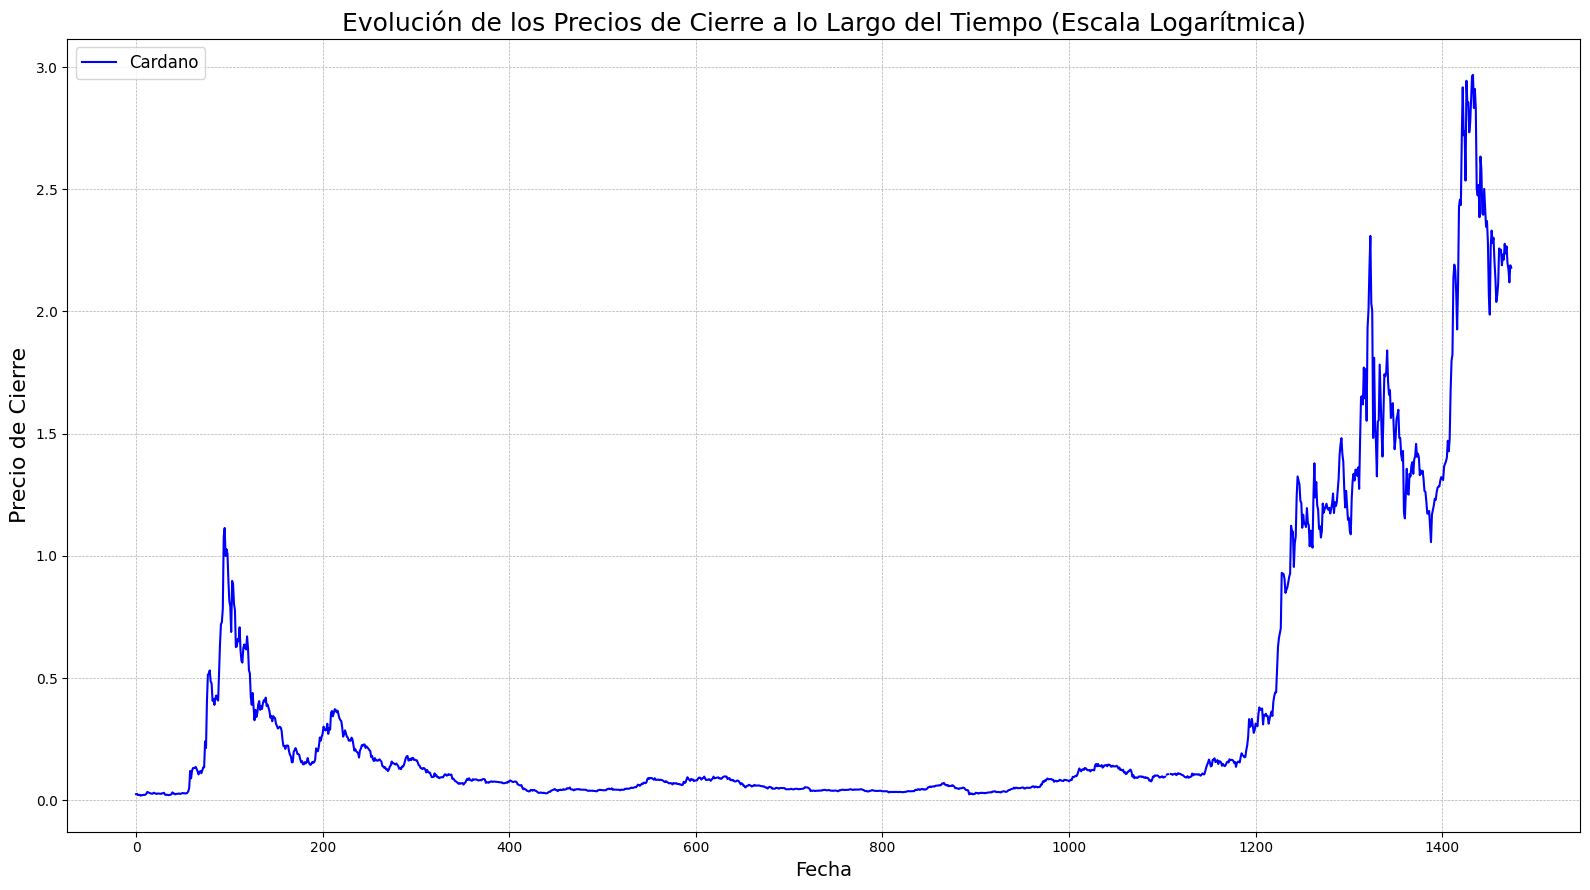

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))

cardano_sql['close'].plot(ax=ax, color='blue', linewidth=1.5)

ax.set_title('Evolución de los Precios de Cierre a lo Largo del Tiempo (Escala Logarítmica)', fontsize=18)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Precio de Cierre', fontsize=16)

ax.legend(['Cardano'], fontsize=12)

ax.grid(which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.show()


Se observan picos significativos en el precio, lo que indica períodos de alta volatilidad o aumentos rápidos en el valor. Tras estos picos, también se ven correcciones en el precio. 